# Basic Functions in NumPy

In [1]:
import numpy as np 

In [2]:
a = np.array([1,2,3])
print(a)
print(a.shape)

[1 2 3]
(3,)


In [3]:
a.sum(axis=0)

6

In [4]:
# a.sum(axis=1)

# this gives this error : AxisError: axis 1 is out of bounds for array of dimension 1

In [5]:
def square(x : np.ndarray):
    '''
        square each element in the input ndarray.
    '''
    return np.power(x,2)

In [6]:
def leaky_relu(x: np.ndarray) -> np.ndarray:
    '''
        apply "leaky relu" function to each element in ndarray.
    '''
    return np.maximum(0.2*x, x)

# Derivatives

We’ll start by simply saying at a high level that the
derivative of a function at a point is the “rate of change” of the output of the function
with respect to its input at that point.


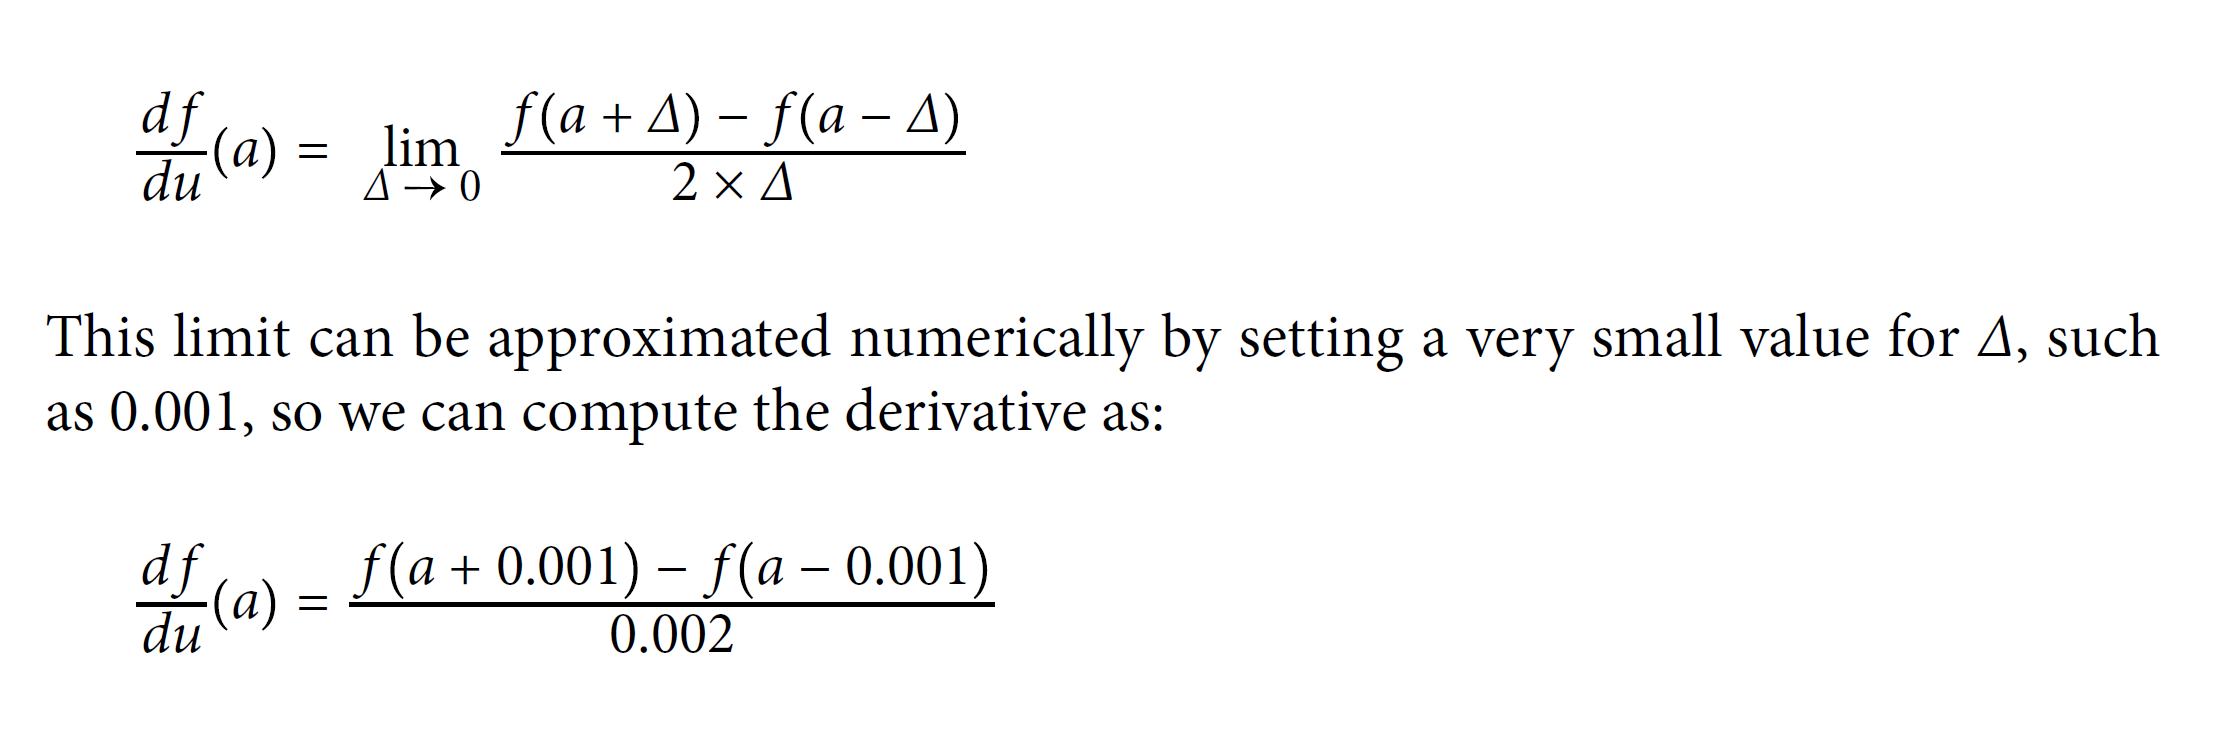

In [7]:
from IPython import display
display.Image("./pic1.png")

In [8]:
from typing import Callable

def deriv(func: Callable[[np.ndarray], np.ndarray],
          input_: np.ndarray,
          delta: float=0.001
         ) -> np.ndarray:
    
    '''
        Evaluates the derivative of a function "func" at every element in the "input_" array.
    '''
    return (func(input_ + delta) - func(input_ - delta)) / (2*delta)

In [9]:
'''
def f(input):
    # some transformation(s)
    return output

P = f(E)

'''

'\ndef f(input):\n    # some transformation(s)\n    return output\n\nP = f(E)\n\n'

# NESTED FUNCTIONS

In [10]:
def chain_length_2(chain, a):
    '''
        evaluates two functions in a row, in a "Chain".
    '''
    assert(len(chain) == 2)
    f1 = chain[0]
    f2 = chain[1]
    
    return f2(f1(x))

# The Chain Rule

The chain rule is a mathematical theorem that lets us compute derivatives of composite
functions. Deep learning models are, mathematically, composite functions, and
reasoning about their derivatives is essential to training them, as we’ll see in the next
couple of chapters.

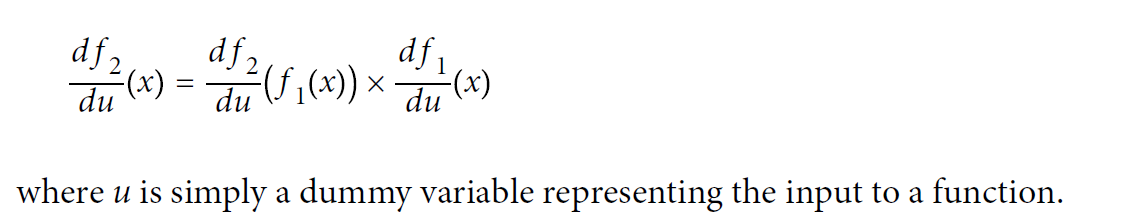

In [11]:
display.Image("./pic2.png")

In [12]:
def sigmoid(x):
    '''
        Apply the sigmoid function to each element in the input ndarray.
    '''
    return 1 / (1 + np.exp(-x))

# Let's code up the chain rule

In [13]:
def chain_deriv_2(chain, input_range: np.ndarray) -> np.ndarray:
    '''
        Uses the chain rule to compute the derivative of two nested functions:
            (f2(f1(x))' = f2'(f1(x)) * f1'(x) )
    '''
    assert(len(chain) == 2)
    # this function requires 'Chain' objects of length 2
    
    assert(input_range.ndim == 1)
    # function requires a 1 dimensional ndarray as input_range 
    
    f1 = chain[0]
    f2 = chain[1]
    
    # df1/dx
    f1_of_x = f1(input_range)
    
    # df1/du
    df1dx = deriv(f1, input_range)
    
    # df2/du(f1(x))
    df2du = deriv(f2, f1(input_range))
    
    # Multiplying these quantities together at each point 
    return df1dx * df2du

In [14]:
def chain_deriv_3(chain, input_range):
    '''
        Uses the chain rule to compute the derivative of three nested functions: 
        (f3(f2(f1)))' = f3'(f2(f1(x))) * f2'(f1(x)) * f1'(x)
    '''
    
    assert(len(chain) == 3)
    # this function requires Chain objects to have length 3 
    
    f1 = chain[0]
    f2 = chain[1]
    f3 = chain[2]
    
    # f1(x)
    f1_of_x = f1(input_range)
    
    # f2(f1(x))
    f2_of_x = f2(f1_of_x)
    
    # df3du
    df3du = deriv(f3, f2_of_x)
    
    #df2du
    df2du = deriv(f2, f1_of_x)
    
    #df1dx
    df1dx = deriv(f1, input_range)
    
    # multiplying these quantities together at each point 
    return df1dx * df2du * df3du 

## Functions with Multiple Inputs

In [15]:
def multiple_inputs_add(x,y,sigma):
    assert(x.shape == y.shape)
    
    a = x+y
    return sigma(a)

In [20]:
from sigma import sigma
multiple_inputs_add(1,2,sigma)

ModuleNotFoundError: No module named 'sigma'

->>>>>>>>>>>  f(x,y) = sigma(alpha(x,y))


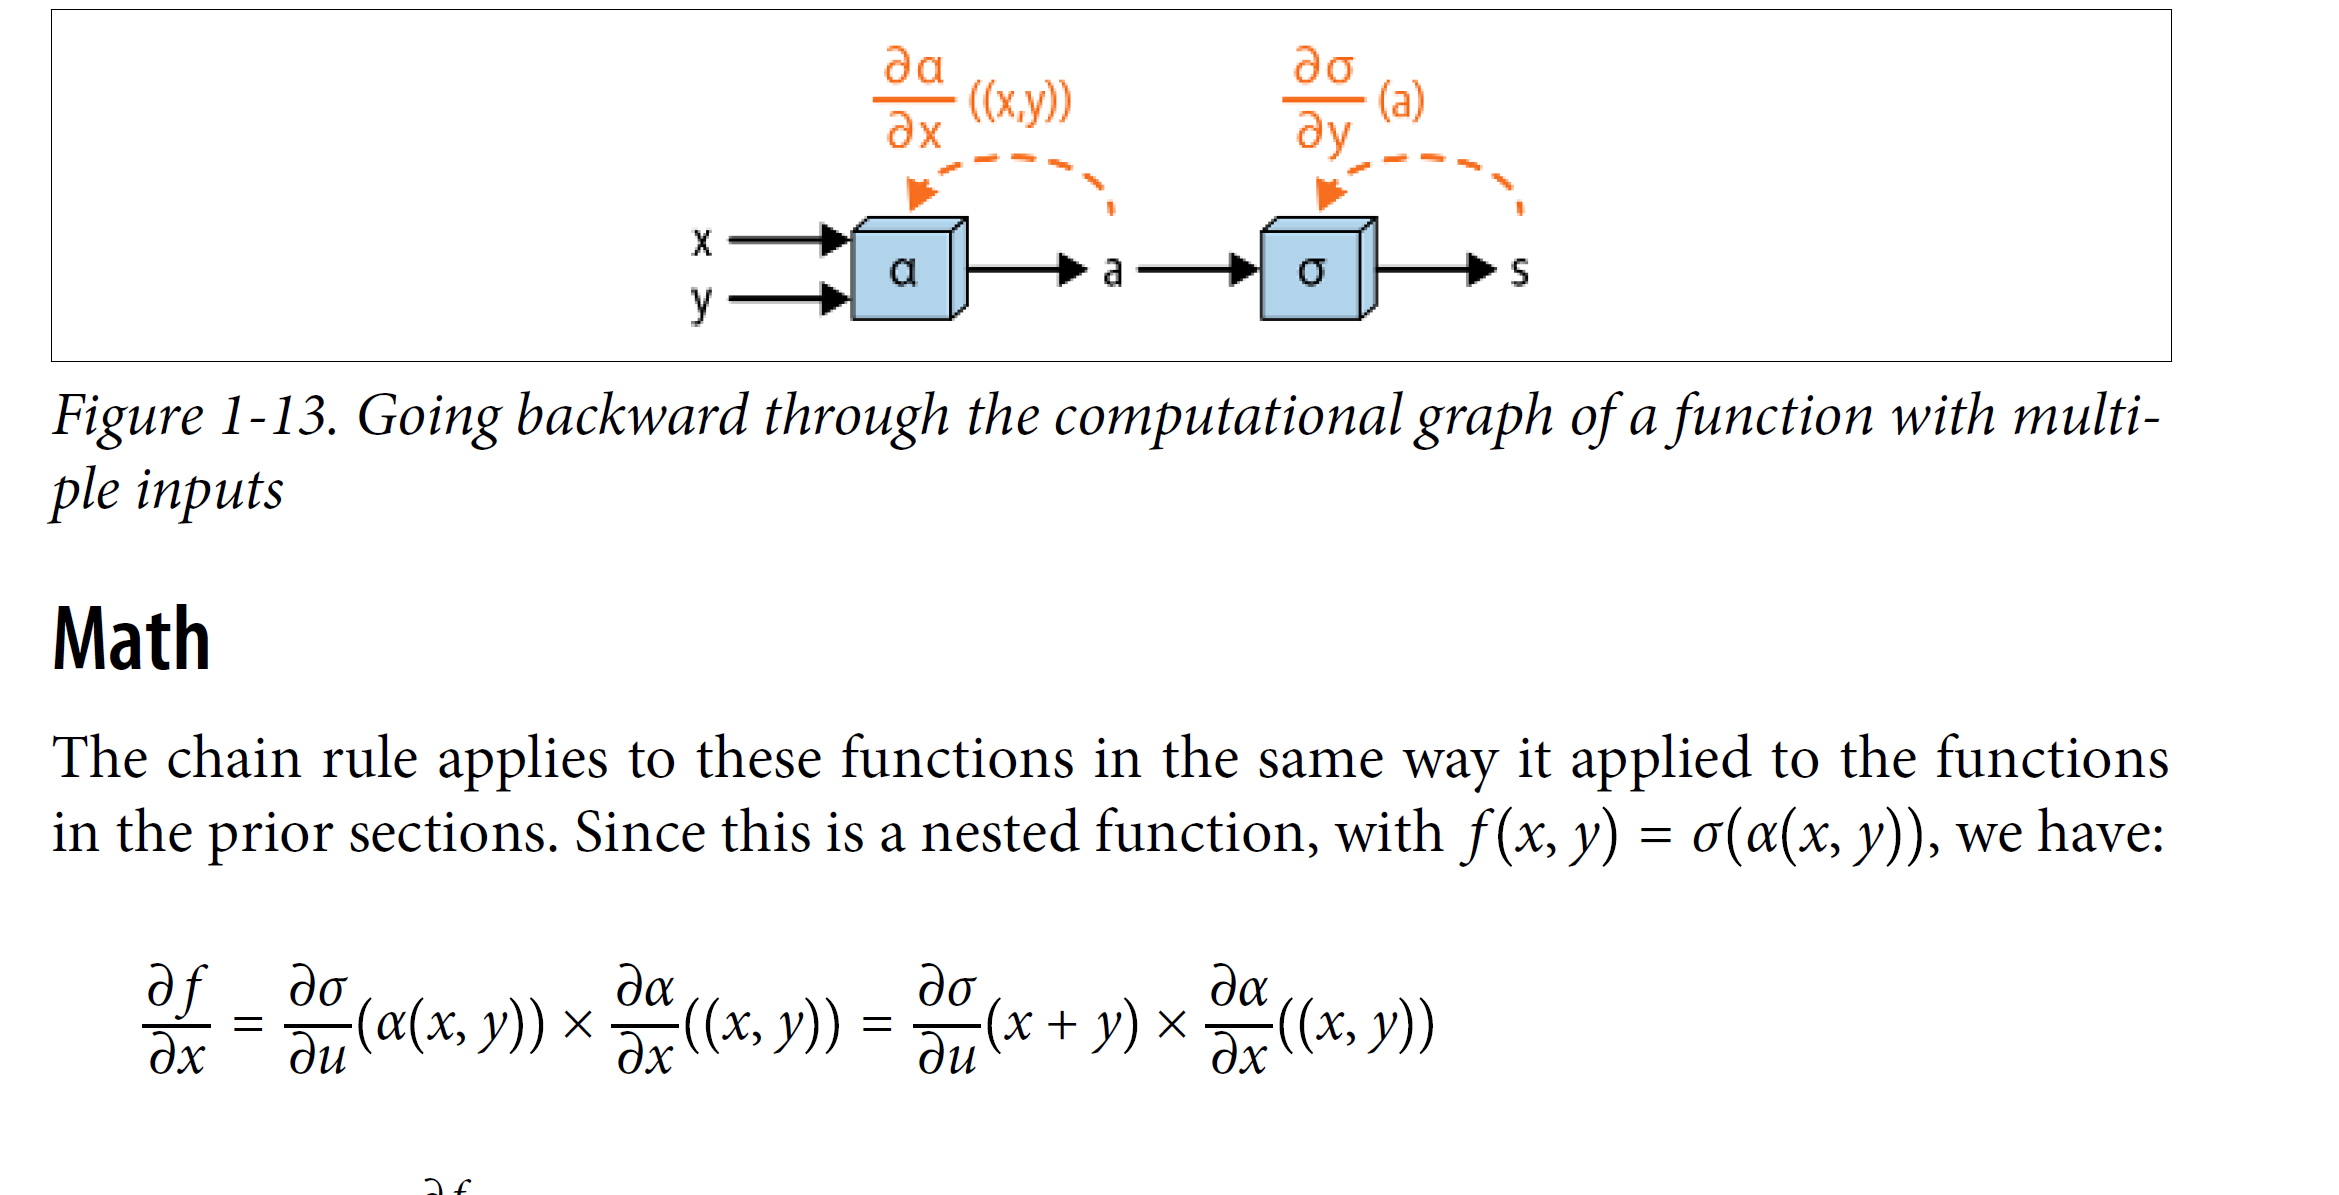

In [21]:
from IPython import display
display.Image("./pic3.png")

In [ ]:
def multiple_inputs_add_backward(x,y, sigma):
    '''
        computes the derivative of this simple function with respect to both inputs. 
    '''
    
    # compute "forward pass"
    a = x+y 
    
    # compute "derivatives"
    dsda = deriv(sigma, a)
    
    dadx, dady = 1, 1
    
    return dsda * dadx, dsda * dady 

## Functions with Multiple Vector Inputs

### DOT PRODUCT

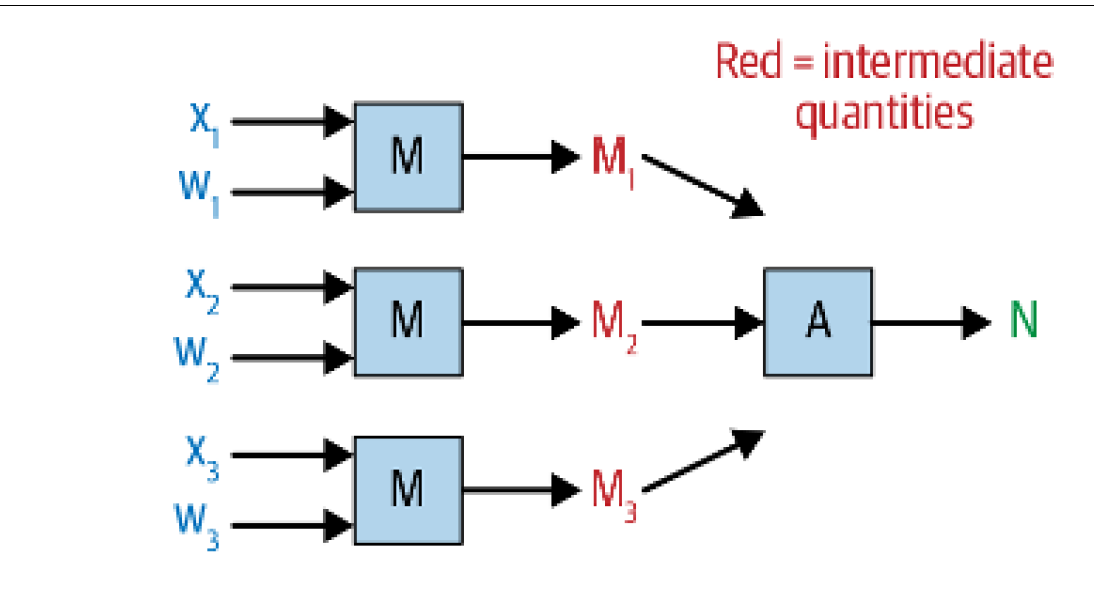

In [22]:
display.Image("./pic4.png")

In [24]:
import numpy as np 
def matmul_forward(X, W): # matmul : matrix multiplication
    '''
        computes the forward pass of a matrix multiplication.
    '''
    
    assert X.shape[1] == W.shape[0]
    
    '''
        For matrix multiplication, the number of columns in the first array should
        match the number of rows in the second; instead the number of columns in the
        first array is {0} and the number of rows in the second array is {1}.
    '''.format(X.shape[1], W.shape[0])
    
    # matrix multiplication 
    N = np.dot(X, W)  # 1. satir komple al * 1.sütunu tamamen al = matrix carpimi
    
    return N

## Derivatives of Functions with Multiple Vector Inputs

For vector functions, it isn’t immediately obvious what the
derivative is: if we write a dot product as ν(X,W) = N, as in the prior section, the
question naturally arises—what would ∂N/∂X and ∂N/∂W be?

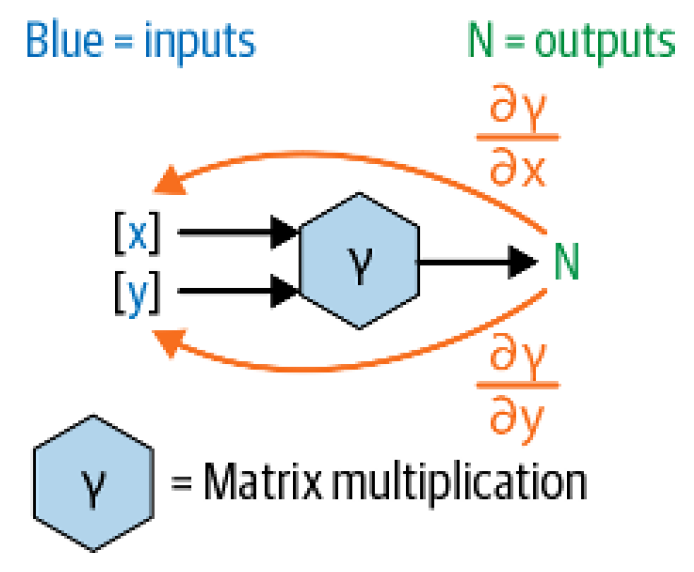

In [25]:
display.Image("./pic5.png")

In [26]:
def matmul_backward_first(X, W):
    '''
        computes the backward pass of a matrix multiplication with respect to the first argument.
    '''
    
    # backward pass 
    dNdX = np.transpose(W, (1,0))
    
    return dNdX

## Vector Functions and Their Derivatives: One Step Further

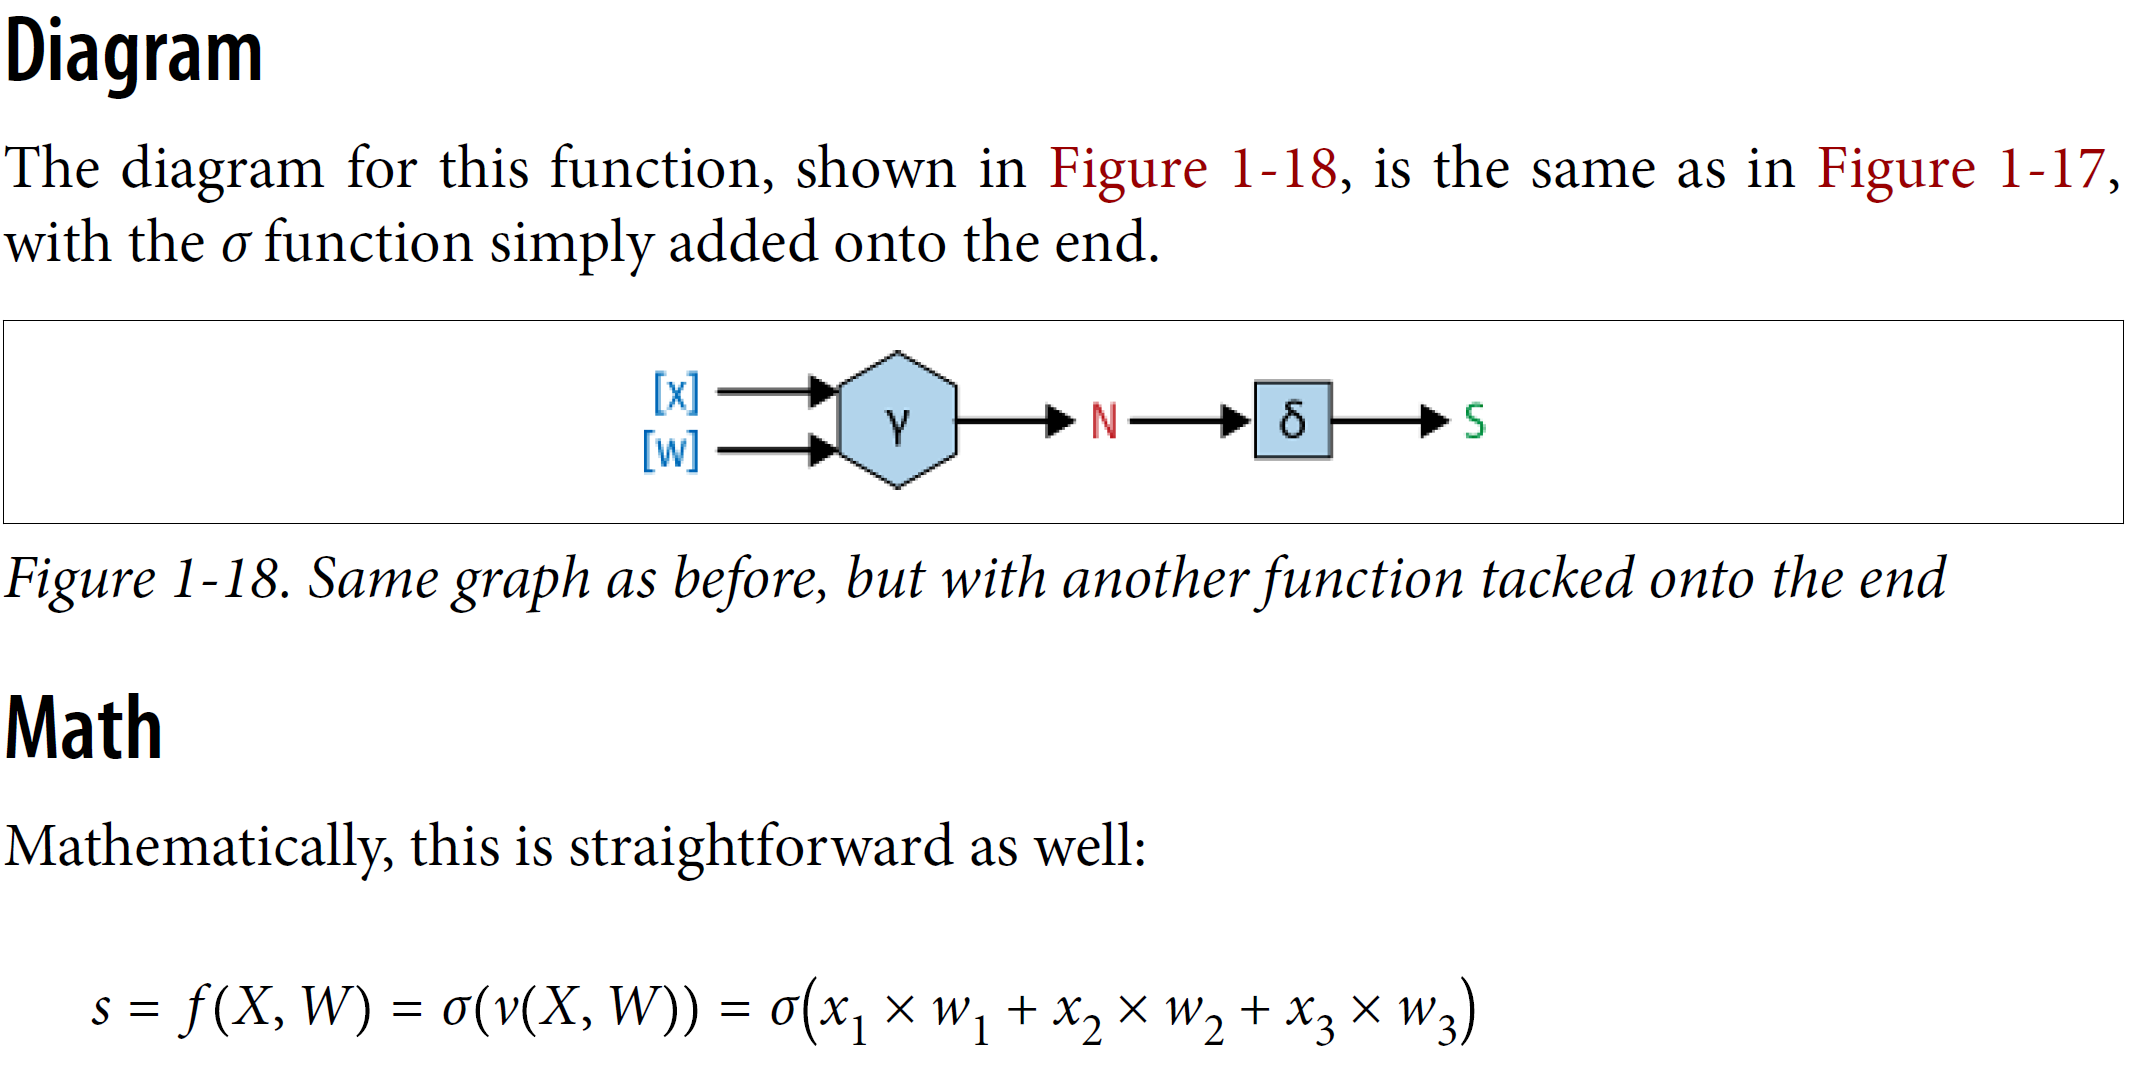

In [27]:
display.Image("./pic6.png")

In [28]:
def matrix_forward_extra(X, W, sigma):
    '''
        computes the forward pass of a function involving matrix multiplication,
        one extra function
    '''
    assert(X.shape[1] == W.shape[0])
    
    # matrix multiplication 
    N = np.dot(X, W)
    
    # feeding the output of the matrix multiplication through sigma 
    S = sigma(N)
    
    return S

## Vector Functions and Their Derivatives: The Backward Pass

In [ ]:
# Since f(X, W) is a nested function—specifically, f(X, W) = σ(ν(X, W))—its derivative
# with respect to, for example, X should conceptually be:

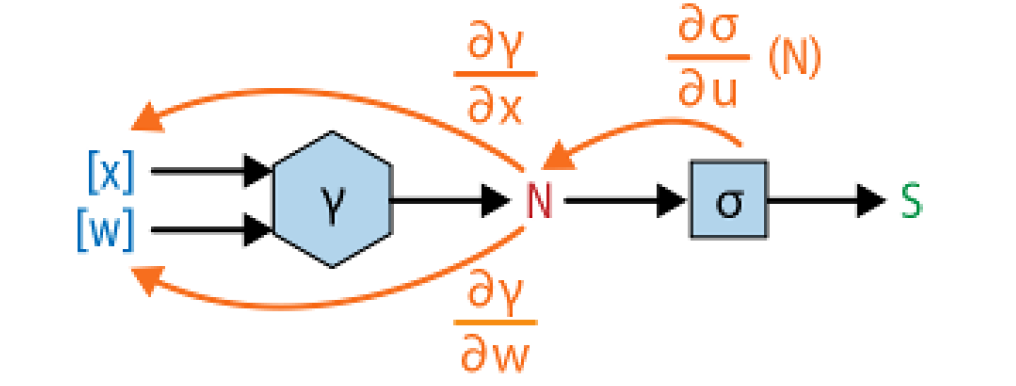

In [29]:
display.Image("./pic7.png")

In [30]:
def matrix_function_backward_1(X, W, sigma):
    '''
        computes the derivative of our matrix function with respect to the first element.
    '''
    
    assert(X.shape[1] == W.shape[0])
    
    # matrix multiplication 
    N = np.dot(X, W)
    
    # feeding the output of the matrix multiplication through sigma 
    S = sigma(N)
    
    # backward calculation 
    dSdN = deriv(sigma, N)   # deriv(fonksiyon, input of function, delta(default value) )
    
    # dNdX
    dNdX = np.transpose(W, (1,0))
    
    # multiply them together; since dNdX is 1x1 here, order doesn't matter 
    return np.dot(dSdN, dNdX)
    

## Computational Graph with Two 2D Matrix Inputs

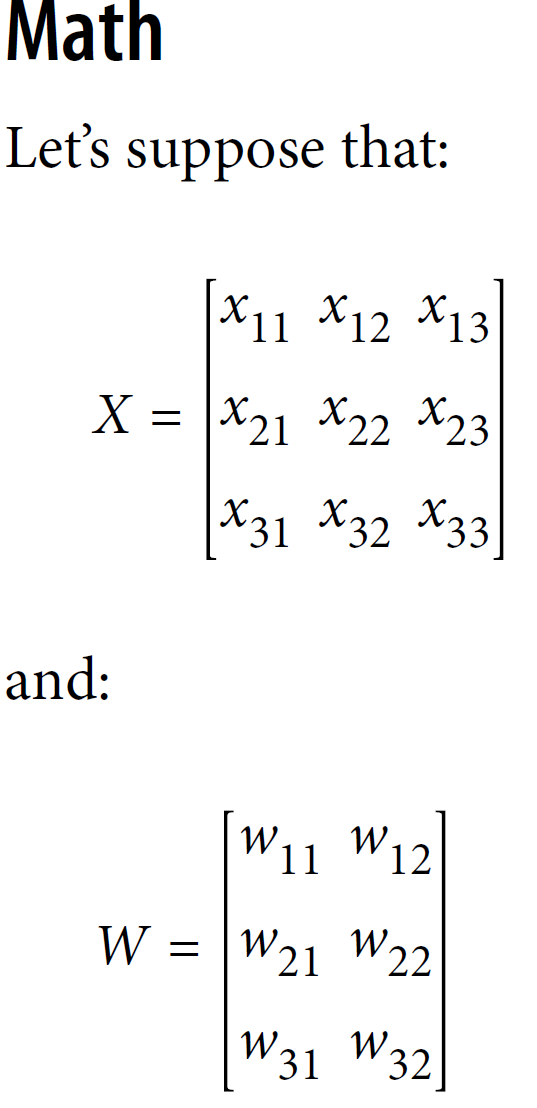

In [31]:
display.Image("./pic8.png")

In [32]:
def matrix_function_forward_sum(X, W, sigma):
    '''
        computing the result of the forward pass of this function 
        with input ndarrays X and W function sigma.
    '''
    
    assert(X.shape[1] == W.shape[0])
    
    # matrix multiplication 
    N = np.dot(X, W)
    
    # feeding the output of the matrix multiplication through sigma 
    S = sigma(N)
    
    # sum all the elements 
    L = np.sum(S)
    
    return L



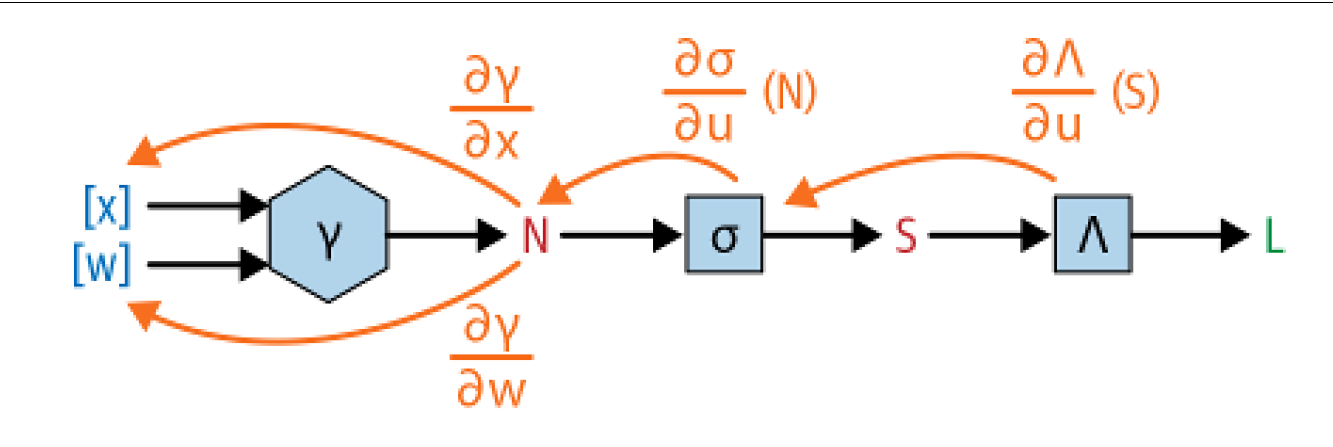

In [33]:
display.Image("./pic9.png")

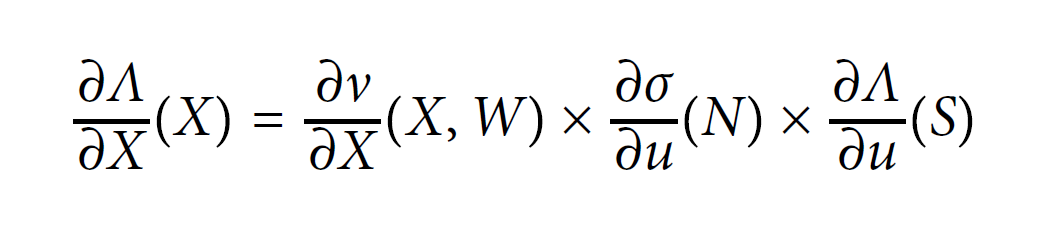

In [34]:
display.Image("./pic10.png")

* The first derivative is the most straightforward and thus makes the best warm-up. We want to know how much L (the output of Λ) will increase if each element of S increases. Since L is the sum of all the elements of S, this derivative is simply:

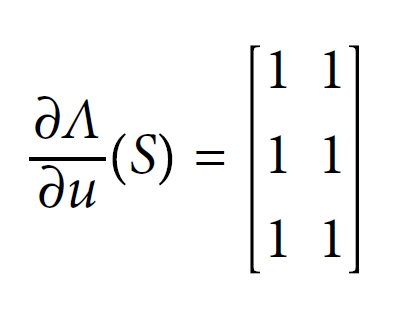

In [35]:
display.Image("./pic11.png")

* since increasing any element of S by, say, 0.46 units would increase Λ by 0.46 units.

* Next, we have ∂σ*(N)/∂u  . This is simply the derivative of whatever function σ is, evaluated at the elements in N. In the "XW" syntax we’ve used previously, this is again simple to compute:

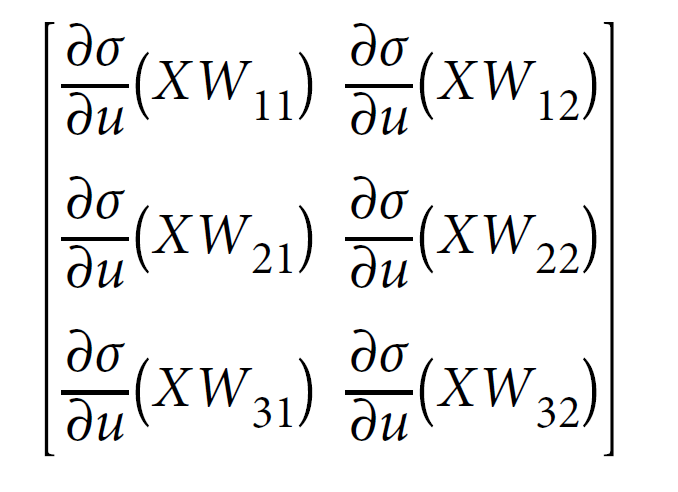

In [36]:
display.Image("./pic12.png")

* Note that at this point we can say for certain that we can multiply these two derivatives together elementwise and compute ∂L ∂u N :

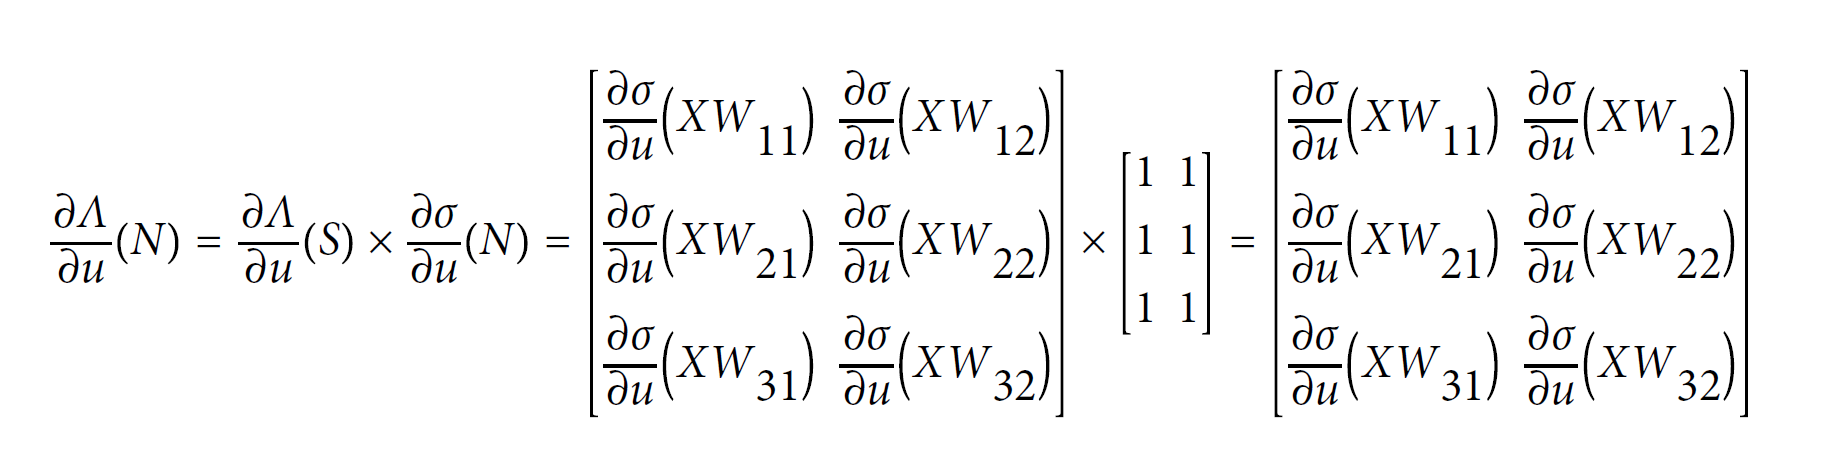

In [37]:
display.Image("./pic13.png")

In [39]:
def matrix_function_backward_sum_1(X, W, sigma):
    '''
        compute derivative of matrix function with a sum 
        with respect to the first matrix input.
    '''
    
    assert(X.shape[1] == W.shape[0])
    
    # matrix multiplication 
    N = np.dot(X, W)
    
    # feeding the output of the matrix multiplication through sigma 
    S = sigma(N)
    
    # sum all the elements 
    L = np.sum(S)
    
    # note : I'll refer to the derivatives by their quantities here, 
    # unlike the math, where we referred to their function names
    
    # dLdS - just 1s 
    dLdS = np.ones_like(S)
    
    # dSdN
    dSdN = deriv(sigma, N)
    
    # dLdN 
    dLdN = dLdS * dSdN
    
    # dNdX
    dNdX = np.transpose(W, (1,0))
    
    # dLdX
    dLdX = np.dot(dSdN, dNdX)
    
    return dLdX


In [40]:
np.random.seed(190204)
X = np.random.randn(3, 3)
W = np.random.randn(3, 2)
print("X:")
print(X)
print("L:")
print(round(matrix_function_forward_sum(X, W, sigmoid), 4))
print()
print("dLdX:")
print(matrix_function_backward_sum_1(X, W , sigmoid))

X:
[[-1.57752816 -0.6664228   0.63910406]
 [-0.56152218  0.73729959 -1.42307821]
 [-1.44348429 -0.39128029  0.1539322 ]]
L:
2.3755

dLdX:
[[ 0.2488887  -0.37478057  0.01121962]
 [ 0.12604152 -0.27807404 -0.13945837]
 [ 0.22992798 -0.36623443 -0.02252592]]


* As in the previous example, since dLdX represents the gradient of X with respect to L, this means that, for instance, the top-left element indicates that 

                    ∂Λ(x,w)/∂x11 = 0.2489.
                    
* Thus, if the matrix math for this example was correct, 
    then increasing x11 by 0.001 should increase L by 0.01 × 0.2489. Indeed, we see that this is what happens:

In [41]:
X1 = X.copy()
X1[0, 0] += 0.001

In [42]:
print(round(
(matrix_function_forward_sum(X1, W, sigmoid) - \
matrix_function_forward_sum(X, W, sigmoid)) / 0.001, 4))

0.2489


* Looks like the gradients were computed correctly!